# Пример работы с двухжидкостной неустойчивостью для карт

Пример на основе https://arxiv.org/pdf/1611.07672.pdf галактики ESO534-G001 и 2dFRS S833Z022

In [1]:
from IPython.display import HTML
from IPython.display import Image
import os
from PIL import Image as ImagePIL

%pylab
%matplotlib inline
%run ../../utils/load_notebook.py

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
from photometry import *

importing Jupyter notebook from photometry.ipynb
Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [3]:
from instabilities import *

importing Jupyter notebook from instabilities.ipynb
Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [4]:
from utils import *

importing Jupyter notebook from utils.ipynb


In [5]:
name = 'ESO534-G001'
gtype = 'SBm' #LEDA
incl = 74.0  #from arxiv
distance = 20.0 #Mpc, arxiv
scale = 0.097 #kpc/arcsec according to Noordermeer distance

data_path = '../../data/demo_data'
sin_i, cos_i = np.sin(incl*np.pi/180.), np.cos(incl*np.pi/180.)
print sin_i, cos_i

0.961261695938 0.275637355817


In [6]:
%%javascript 
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

<h2 id="tocheading">Оглавление</h2>
<div id="toc"></div>

In [8]:
basewidth, baseheight = 814, 814

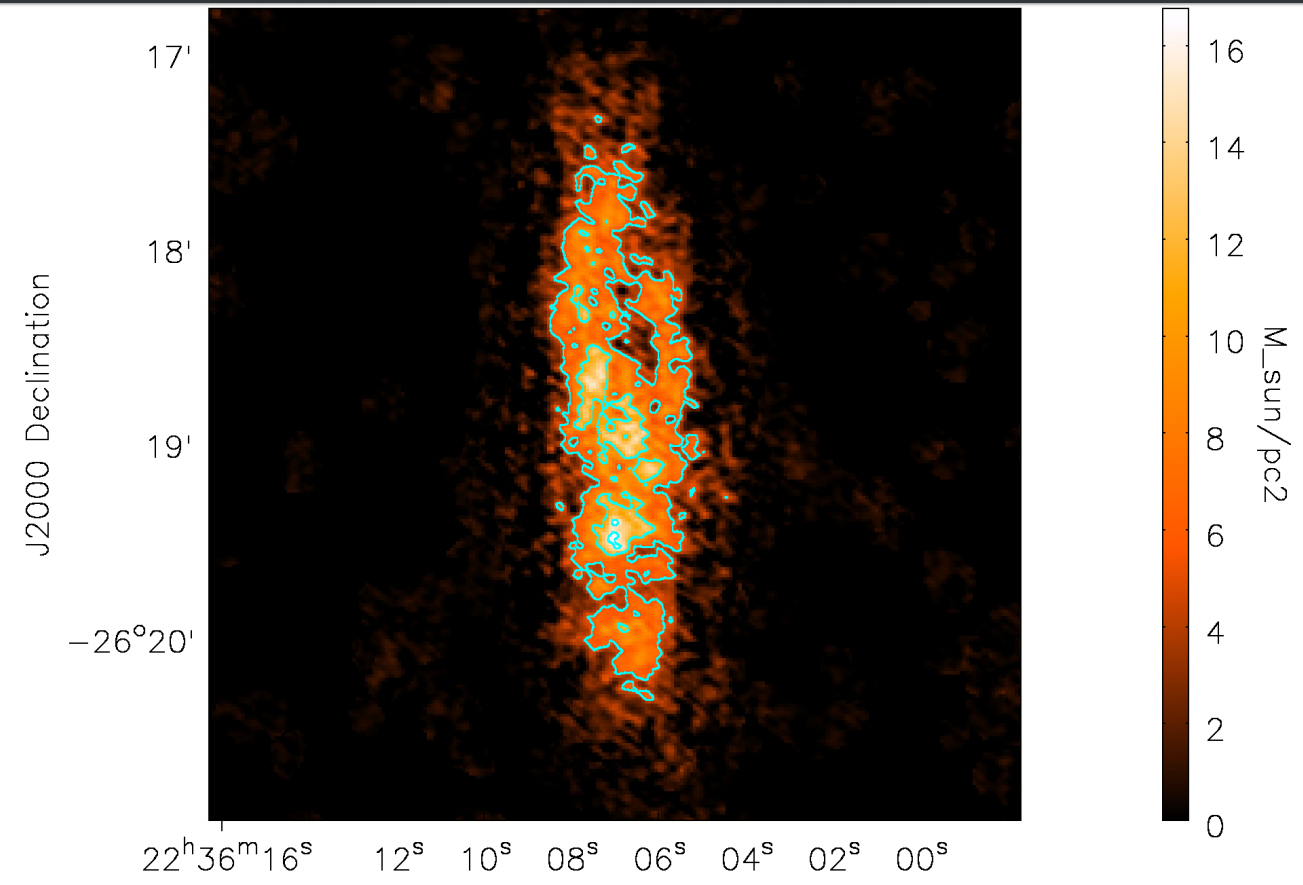

In [9]:
Image('full_HI_Sigma.png', width=700)

In [10]:
Sigma_raw = ImagePIL.open('HI_Sigma.png')

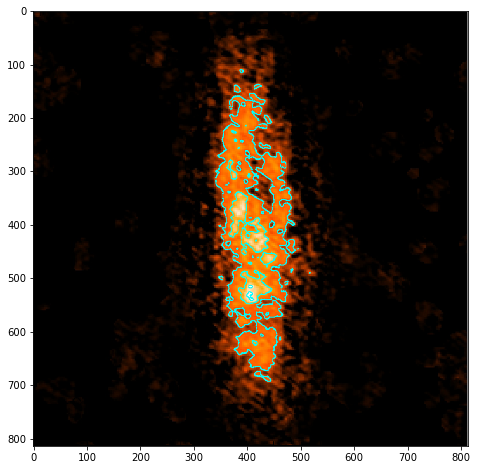

In [11]:
plt.figure(figsize=[8, 8])
plt.imshow(Sigma_raw)

In [12]:
Sigma_raw.height, Sigma_raw.width

(814, 814)

In [13]:
fdata = list(Sigma_raw.getdata())

In [14]:
np.array(fdata).shape, 814*814

((662596L, 4L), 662596)

In [15]:
def color_to_level(color):
    '''Вычисляем исходную величину из цвета'''
#     r, g, b = color
#     print color
    color = color[0:3]
    color_max = (255, 243, 234)
    level_max = 16.
#     color_min = (90, 31, 1)
#     level_min = 2.
    color_min = (0, 0, 0)
    level_min = 0.
    return level_min + (level_max-level_min)*np.mean((color- np.array(level_min))/(np.array(color_max) - np.array(level_min)))

In [16]:
X,Y = np.meshgrid(np.arange(0.,814,1), np.arange(0.,814,1))
Z = np.array(fdata).reshape(814, 814, 4)

In [17]:
# for i, row in enumerate(Z):
#     for j, col in enumerate(Z[i]):
#         if (Z[i][j] == np.array([0, 255, 255, 255])).all():
#             Z[i][j] = np.round((Z[i][j-1] + Z[i][j+1] + Z[i+1][j] + Z[i-1][j] + Z[i-1][j-1] + Z[i+1][j+1] + Z[i-1][j+1] + Z[i+1][j-1])/8.)

In [18]:
Z = np.apply_along_axis(color_to_level, 2, Z)

Z = Z[::-1, :] #inverse axes
# Z[Z < 0] = 0.

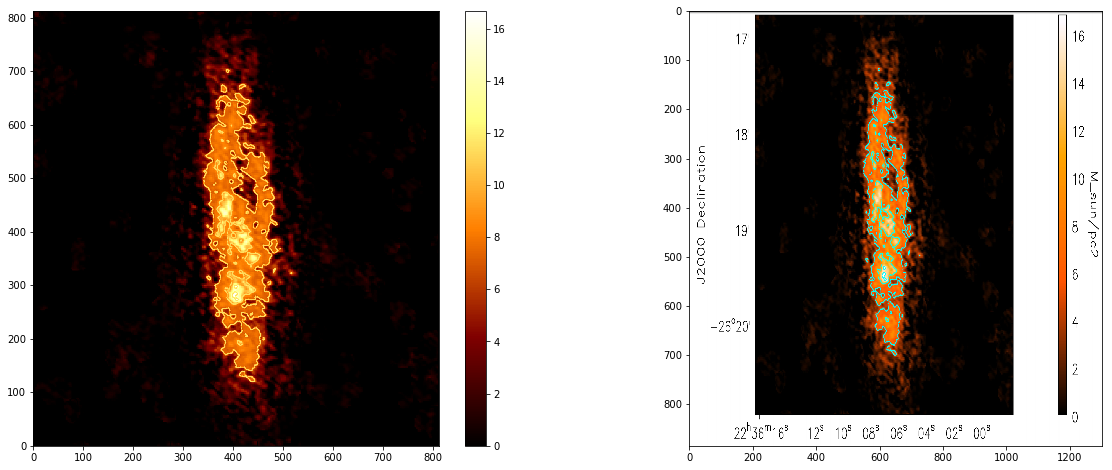

In [19]:
# ax1,ax2 = plt.subplots(ncols=2, nrows=1, figsize=[16, 8])
plt.figure(figsize=[20, 8])
plt.subplot(1, 2, 1)
quadmesh = plt.pcolormesh(X, Y, Z, cmap=cm.afmhot)
# quadmesh.set_clim(vmin=100., vmax=200.)
plt.colorbar()
# quadmesh.cmap.set_under('white')

plt.subplot(1, 2, 2)
plt.imshow(ImagePIL.open('full_HI_Sigma.png'), aspect=1.55);

In [20]:
color_to_level(array([0, 255, 255, 255])) # <- бирюзовый цвет, с которым проблемы 

11.408673630895853

In [21]:
HI_Sigma = Z

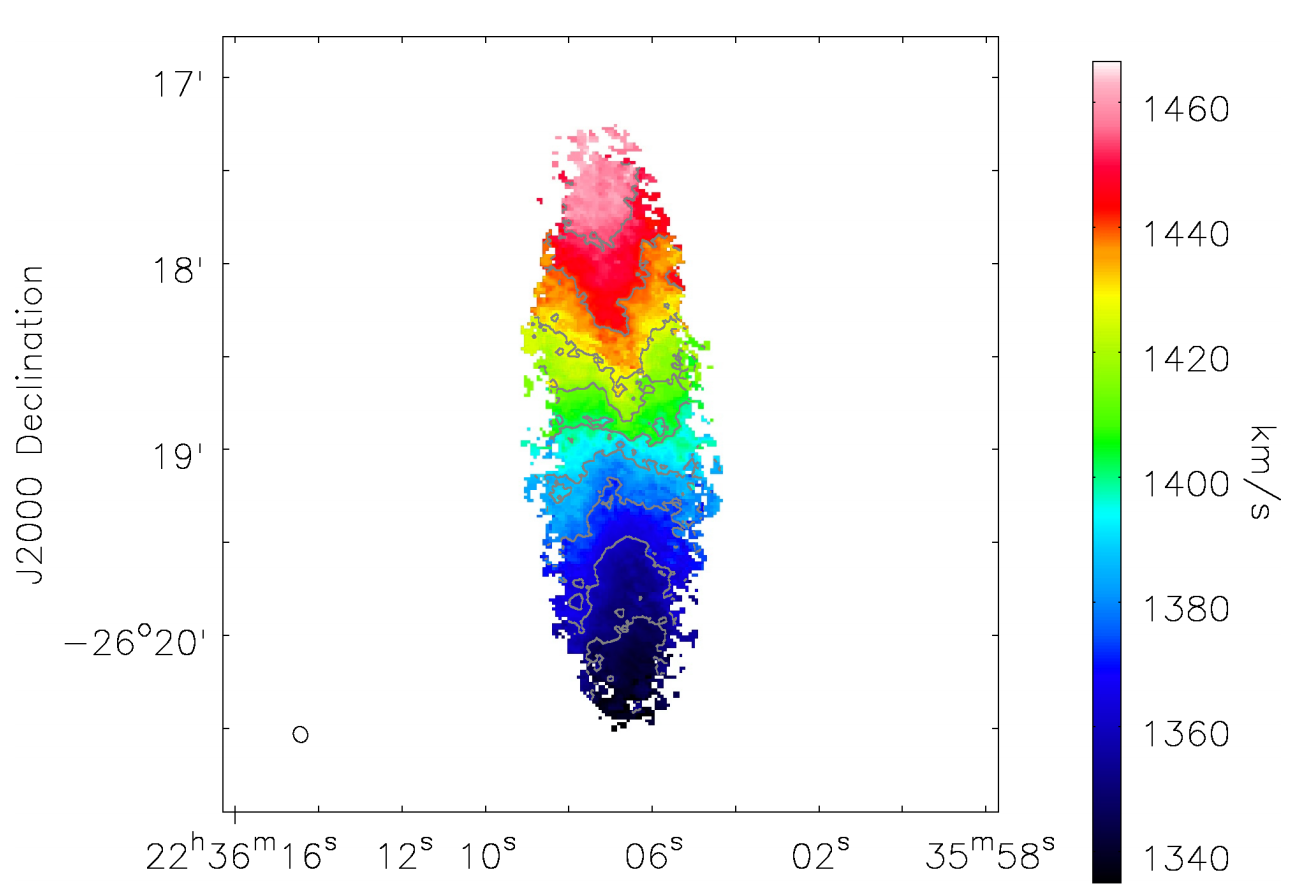

In [22]:
Image('full_Vc.png', width=700)

In [23]:
Vc_raw = ImagePIL.open('Vc.png')

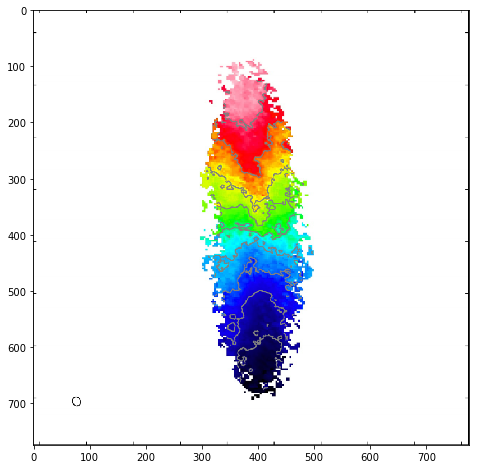

In [24]:
plt.figure(figsize=[8, 8])
plt.imshow(Vc_raw)

In [25]:
Vc_raw = Vc_raw.resize((basewidth, baseheight), ImagePIL.ANTIALIAS)

In [26]:
fdata = list(Vc_raw.getdata())

In [27]:
Vc_raw.height, Vc_raw.width

(814, 814)

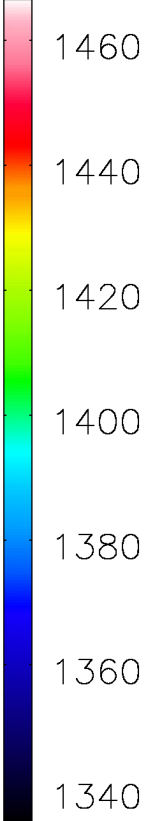

In [28]:
Image('Vc_colorbar.png')

In [29]:
vc_colorbar = ImagePIL.open('Vc_colorbar.png')

In [30]:
vc_colorbar.width, vc_colorbar.height

(148, 821)

In [31]:
vc_colorbar = np.array(list(vc_colorbar.getdata())).reshape(821, 148, 4)

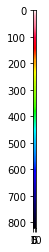

In [32]:
plt.imshow(vc_colorbar[:, 20:30, :].astype(np.uint8))

125 px = 20 km/s

In [33]:
(821-32-40)/120., 125./20.

(6.241666666666666, 6.25)

Да, вполне точно.

Нульпункт:

In [34]:
1340. - 32./6.241 

1334.8726165678577

In [35]:
vc_colorbar = vc_colorbar[:, 20:21, :]

In [36]:
vc_colorbar = vc_colorbar.reshape(821, 4)

In [37]:
vc_colorbar - np.array((3, 0, 39, 255))

array([[215, 215, 177,   0],
       [252, 244, 208,   0],
       [252, 243, 207,   0],
       ..., 
       [ -3,   0, -34,   0],
       [ -3,   0, -36,   0],
       [ -3,   0, -39,   0]])

In [38]:
np.argmin(np.linalg.norm(vc_colorbar - np.array((3, 0, 39, 255)), axis=1))

789

In [39]:
np.round(1334.87 + 789/6.241)

1461.0

In [40]:
def color_to_level(color):
    '''Вычисляем исходную величину из цвета'''
    argmin = np.argmin(np.linalg.norm(vc_colorbar - color, axis=1))
    return np.round(1334.87 + (821-argmin)/6.241)

In [41]:
color_to_level((3, 0, 39, 255))

1340.0

In [42]:
color_to_level((255, 153, 177, 255))

1460.0

In [43]:
color_to_level((255,255,255, 255))

1466.0

In [44]:
color_to_level((0,0,0, 255))

1335.0

In [45]:
X,Y = np.meshgrid(np.arange(0.,basewidth,1), np.arange(0.,baseheight,1))
Z = np.array(fdata).reshape(basewidth, baseheight, 4)

In [46]:
# for i, row in enumerate(Z):
#     for j, col in enumerate(Z[i]):
#         if (Z[i][j] == np.array([255, 255, 255, 255])).all():
#             Z[i][j] = np.array([0,0,0,255])

In [47]:
Z = np.apply_along_axis(color_to_level, 2, Z)

Z = Z[::-1, :] #inverse axes
# Z[Z < 0] = 0.

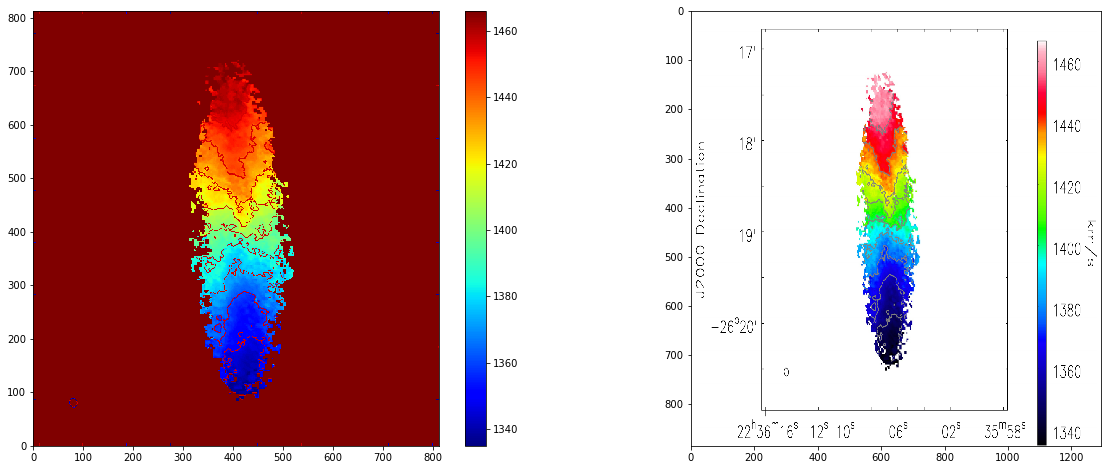

In [48]:
# ax1,ax2 = plt.subplots(ncols=2, nrows=1, figsize=[16, 8])
plt.figure(figsize=[20, 8])
plt.subplot(1, 2, 1)
quadmesh = plt.pcolormesh(X, Y, Z, cmap=cm.jet)
# quadmesh.set_clim(vmin=1330., vmax=1490.)
plt.colorbar()
# quadmesh.cmap.set_under('white')

plt.subplot(1, 2, 2)
plt.imshow(ImagePIL.open('full_Vc.png'), aspect=1.55);

In [49]:
Vc = Z

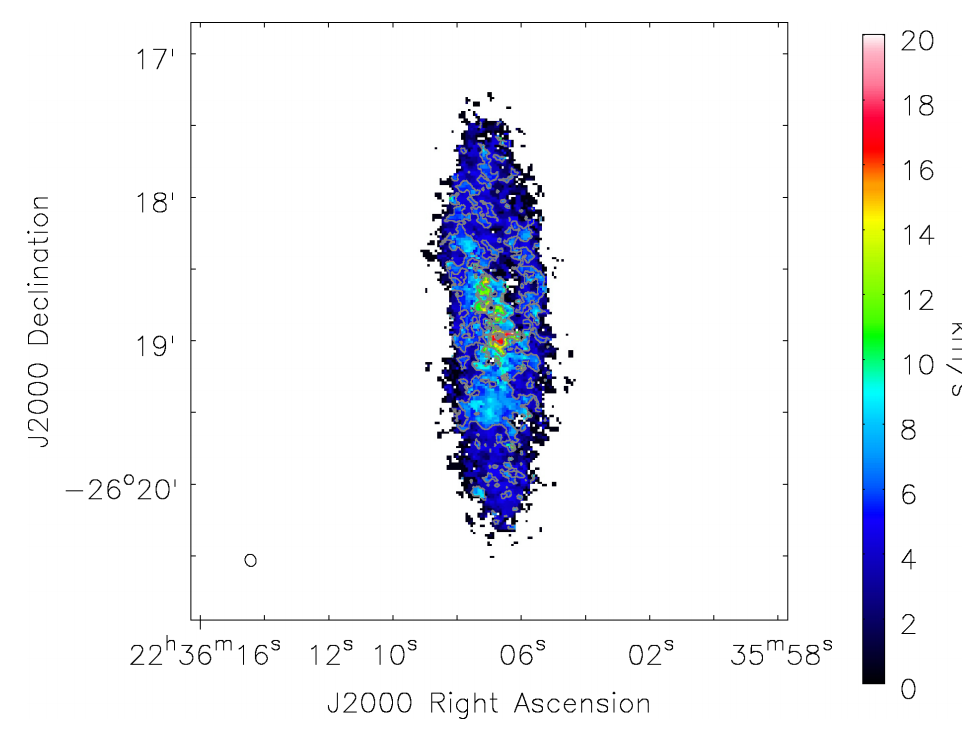

In [50]:
Image('full_HI_disp.png', width=600)

In [51]:
disp_raw = ImagePIL.open('HI_disp.png')

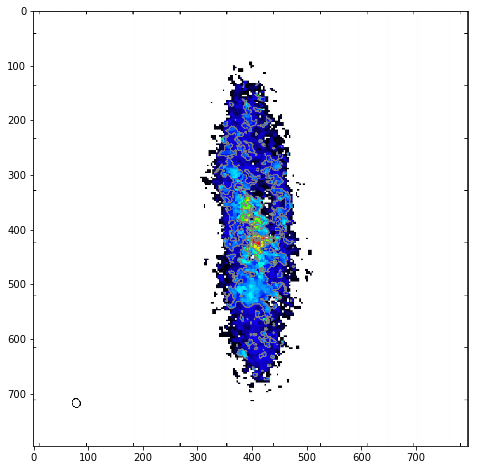

In [52]:
plt.figure(figsize=[8, 8])
plt.imshow(disp_raw)

In [53]:
disp_raw = disp_raw.resize((basewidth, baseheight), ImagePIL.ANTIALIAS)

In [54]:
fdata = list(disp_raw.getdata())

In [55]:
disp_raw.height, disp_raw.width

(814, 814)

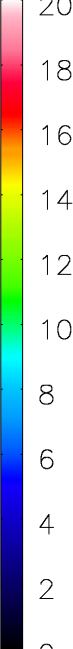

In [56]:
Image('disp_colorbar.png')

In [57]:
disp_colorbar = ImagePIL.open('disp_colorbar.png')

In [58]:
disp_colorbar.width, disp_colorbar.height

(73, 649)

In [59]:
disp_colorbar = np.array(list(disp_colorbar.getdata())).reshape(649, 73, 4)

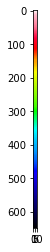

In [60]:
plt.imshow(disp_colorbar[:, 10:20, :].astype(np.uint8))

65 px = 2 km/s

In [61]:
649/20., 65./2.

(32.45, 32.5)

Да, вполне точно.

In [62]:
disp_colorbar = disp_colorbar[:, 10:11, :]

In [63]:
disp_colorbar = disp_colorbar.reshape(649, 4)

In [64]:
def color_to_level(color):
    '''Вычисляем исходную величину из цвета'''
    argmin = np.argmin(np.linalg.norm(disp_colorbar - color, axis=1))
    return np.round(0. + (649-argmin)/32.45)

In [65]:
color_to_level((253, 66, 110, 255))

18.0

In [66]:
color_to_level((14, 0, 202, 255))

4.0

In [67]:
color_to_level((7,0,102, 255))

2.0

In [68]:
color_to_level((255,255,255, 255))

20.0

In [69]:
X,Y = np.meshgrid(np.arange(0.,basewidth,1), np.arange(0.,baseheight,1))
Z = np.array(fdata).reshape(basewidth, baseheight, 4)

In [70]:
Z = np.apply_along_axis(color_to_level, 2, Z)

Z = Z[::-1, :] #inverse axes
# Z[Z < 0] = 0.

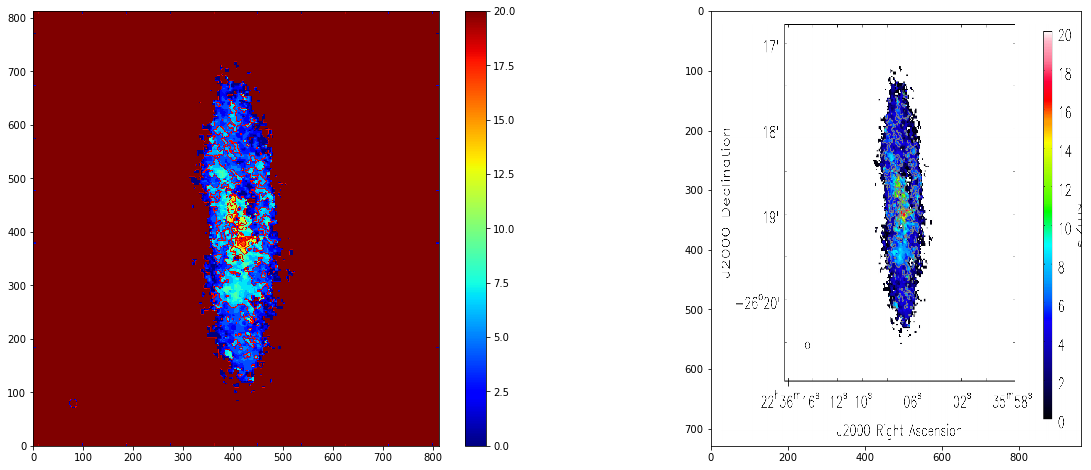

In [71]:
# ax1,ax2 = plt.subplots(ncols=2, nrows=1, figsize=[16, 8])
plt.figure(figsize=[20, 8])
plt.subplot(1, 2, 1)
quadmesh = plt.pcolormesh(X, Y, Z, cmap=cm.jet)
# quadmesh.set_clim(vmin=0.0, vmax=19.)
plt.colorbar()
# quadmesh.cmap.set_under('white')
# quadmesh.cmap.set_over('white')

plt.subplot(1, 2, 2)
plt.imshow(ImagePIL.open('full_HI_disp.png'), aspect=1.55);

In [72]:
disp = Z

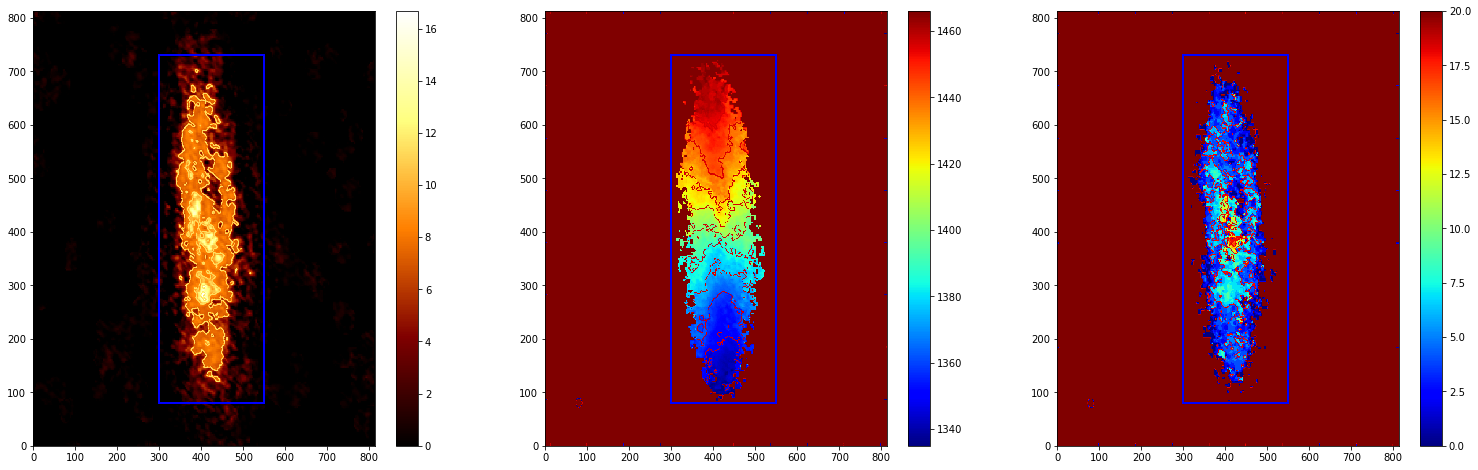

In [73]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, nrows=1, figsize=[26, 8], sharey=True)

plt.subplot(1, 3, 1)
quadmesh = plt.pcolormesh(X, Y, HI_Sigma, cmap=cm.afmhot)
plt.colorbar()

rect = matplotlib.patches.Rectangle((300,80),250,650,linewidth=2,edgecolor='b',facecolor='none')
plt.gca().add_patch(rect)

plt.subplot(1, 3, 2)
quadmesh = plt.pcolormesh(X, Y, Vc, cmap=cm.jet)
plt.colorbar()

rect = matplotlib.patches.Rectangle((300,80),250,650,linewidth=2,edgecolor='b',facecolor='none')
plt.gca().add_patch(rect)

plt.subplot(1, 3, 3)
quadmesh = plt.pcolormesh(X, Y, disp, cmap=cm.jet)
plt.colorbar()

rect = matplotlib.patches.Rectangle((300,80),250,650,linewidth=2,edgecolor='b',facecolor='none')
plt.gca().add_patch(rect)

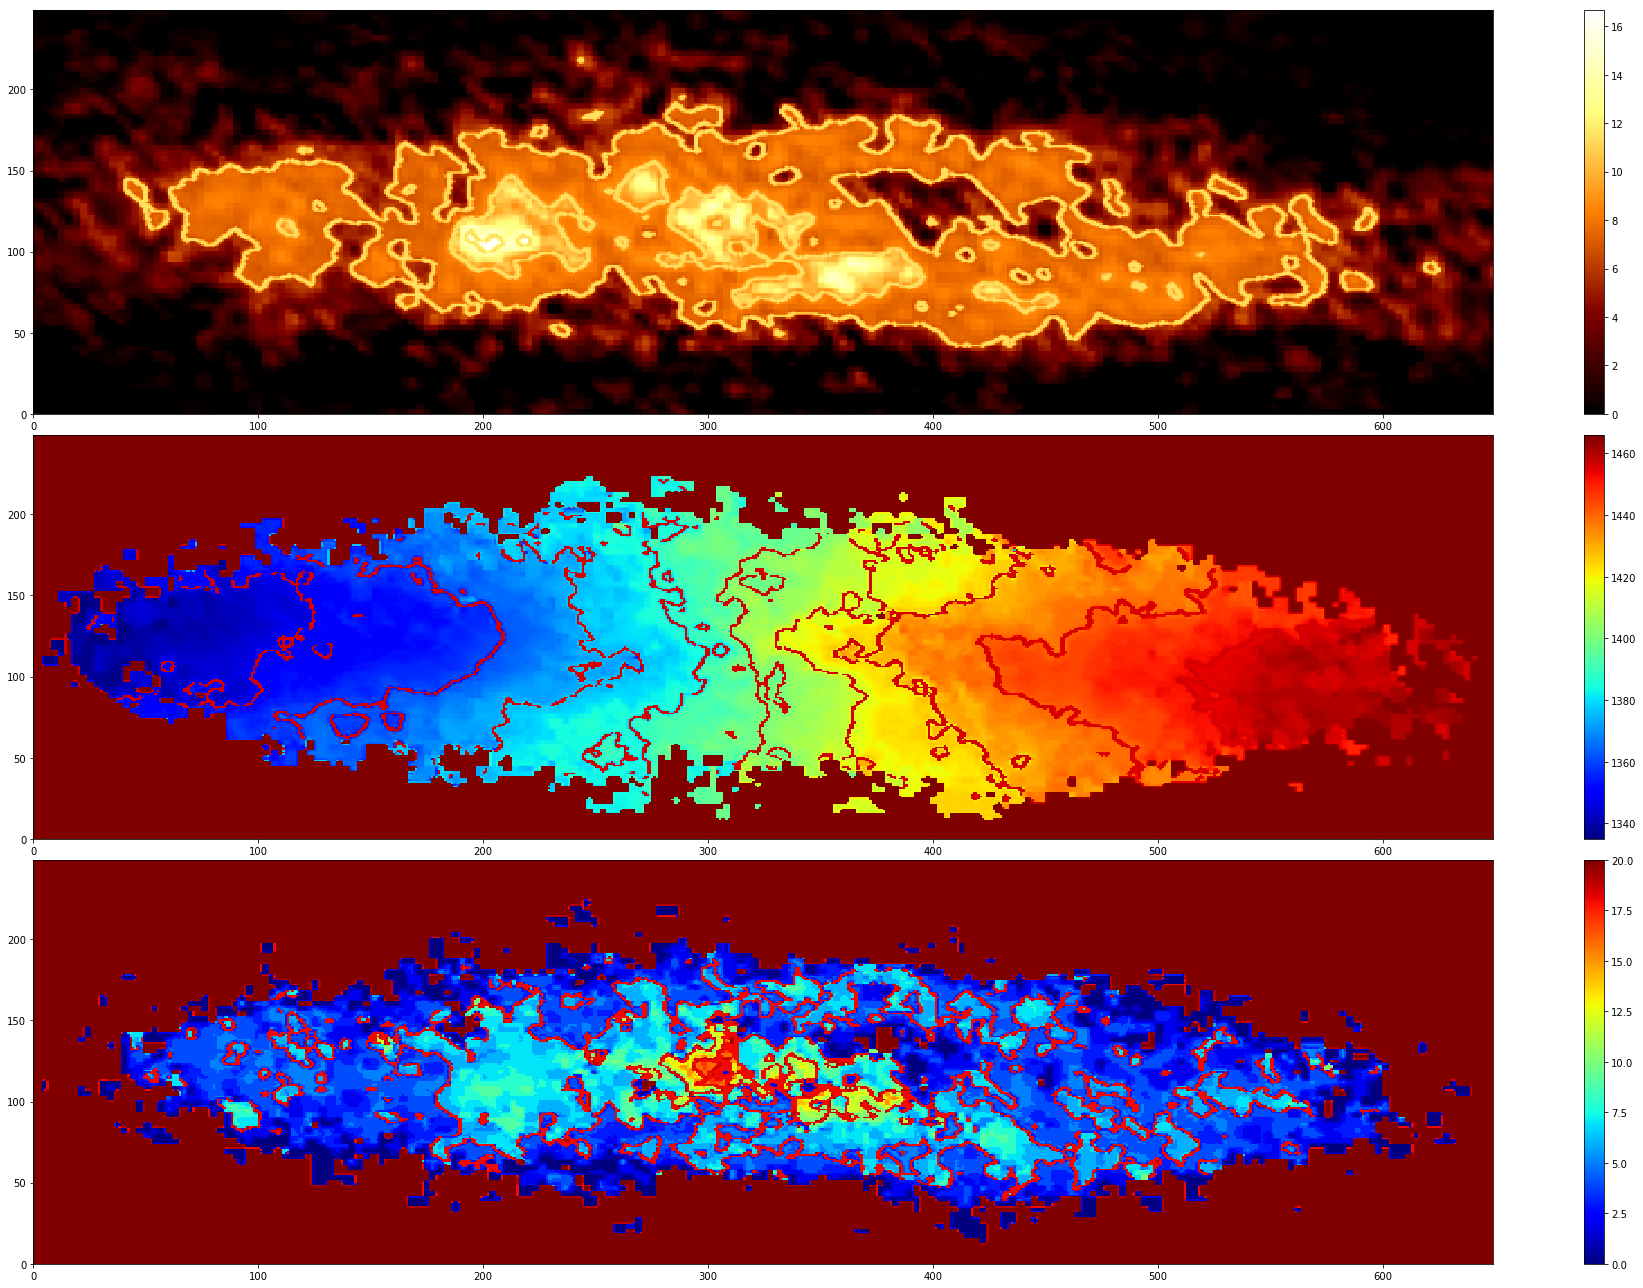

In [74]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=1, nrows=3, figsize=[26, 18], sharex=True)

XX,YY = np.meshgrid(np.arange(0.,650,1), np.arange(0.,250,1))

plt.subplot(3, 1, 1)
quadmesh = plt.pcolormesh(XX, YY, HI_Sigma[80:730, 300:550].T, cmap=cm.afmhot)
plt.colorbar()

plt.subplot(3, 1, 2)
quadmesh = plt.pcolormesh(XX, YY, Vc[80:730, 300:550].T, cmap=cm.jet)
plt.colorbar()

plt.subplot(3, 1, 3)
quadmesh = plt.pcolormesh(XX, YY, disp[80:730, 300:550].T, cmap=cm.jet)
plt.colorbar()

plt.tight_layout(h_pad=0.)

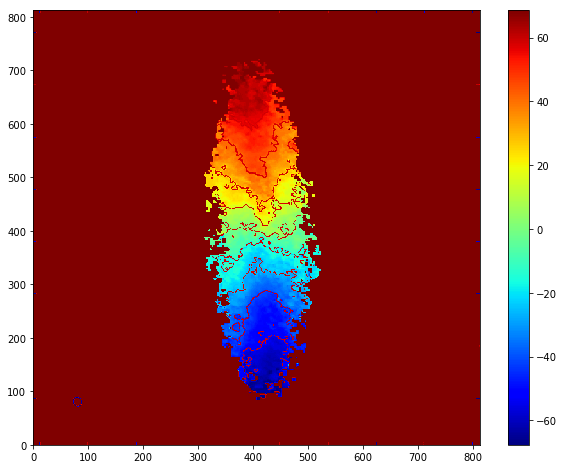

In [75]:
# ax1,ax2 = plt.subplots(ncols=2, nrows=1, figsize=[16, 8])
plt.figure(figsize=[10, 8])
quadmesh = plt.pcolormesh(X, Y, (Vc-1400)/sin_i, cmap=cm.jet)
# quadmesh.set_clim(vmin=1330., vmax=1455.5)
# quadmesh.cmap.set_over('white')
plt.colorbar()

In [76]:
tmp_ = (Vc-1400)/sin_i

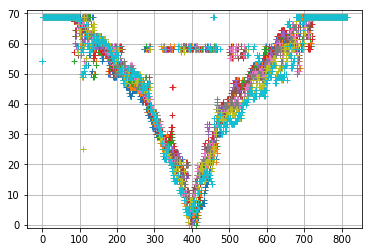

In [77]:
for p in range(400, 440, 4):
    plt.plot(np.arange(0, baseheight, 1), np.abs(tmp_[:, p]), '+')
    
plt.ylim(-1, 71)
plt.grid()

Вполне похоже

$$\kappa=\sqrt{2}\frac{\vartheta_c}{R}\sqrt{1+\frac{R}{\vartheta_c}\frac{d\vartheta_c}{dR}}$$

In [78]:
Vc = (Vc[80:730, 300:550].T-1400.)/sin_i

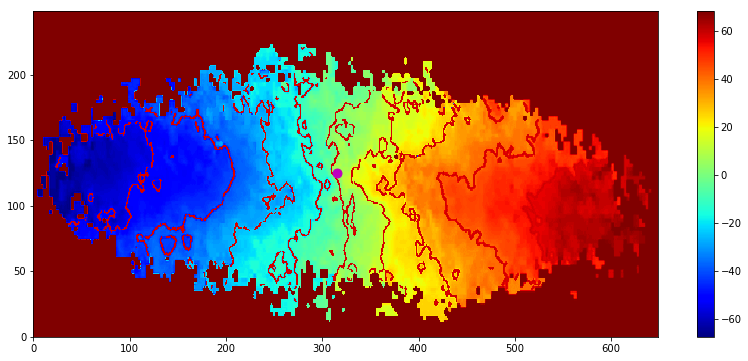

In [79]:
XX,YY = np.meshgrid(np.arange(0.,650,1), np.arange(0.,250,1))
plt.figure(figsize=[14, 6])
quadmesh = plt.pcolormesh(XX, YY, Vc, cmap=cm.jet)
plt.colorbar()
plt.scatter(315., 125., 80., color='m')

In [80]:
ang_X = 18.5 #arcsec
ang_Y = 8.5*60 #arcsec

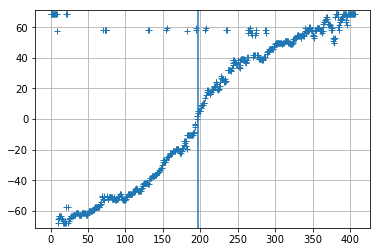

In [81]:
plt.plot(np.arange(0, 650, 1)*ang_Y/basewidth, (Vc[125, :]), '+')
plt.ylim(-71, 71)
plt.axvline(x=315*ang_Y/basewidth)
plt.grid()

In [82]:
Z = np.zeros(Vc.shape)

In [83]:
for i, row in enumerate(Vc):
    for j, col in enumerate(Vc[i]):
        Z[i][j] = np.abs(np.sqrt( ang_X**2 * (i-125)**2  + ang_Y**2 * (j-315)**2)/basewidth)

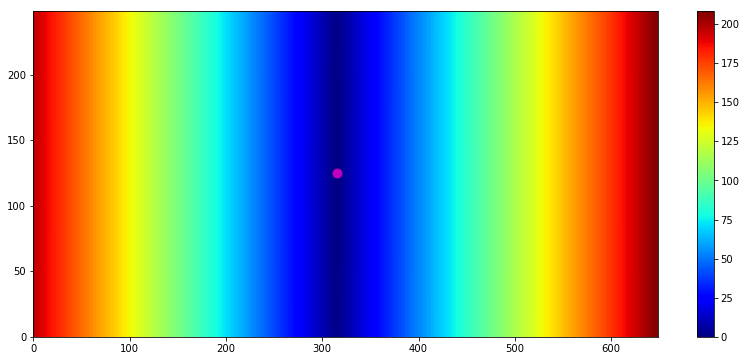

In [84]:
XX,YY = np.meshgrid(np.arange(0.,650,1), np.arange(0.,250,1))
plt.figure(figsize=[14, 6])
quadmesh = plt.pcolormesh(XX, YY, Z, cmap=cm.jet)
plt.colorbar()
plt.scatter(315., 125., 80., color='m')

In [85]:
epi = np.zeros(Vc.shape)

for i, row in enumerate(Vc):
    for j, col in enumerate(Vc[i]):
        R = np.abs(np.sqrt( ang_X**2 * (i-125)**2  + ang_Y**2 * (j-315)**2)/basewidth)
        epi[i][j] = sqrt(2.) * np.abs(Vc[i][j]) / (R * scale )
#         TODO: fix this

In [86]:
def epicyclicFreq_real(poly_gas, R, resolution):
    return sqrt(2.0) * poly_gas(R) * sqrt(1 + R * poly_gas.deriv()(R) / poly_gas(R)) / (R * resolution )

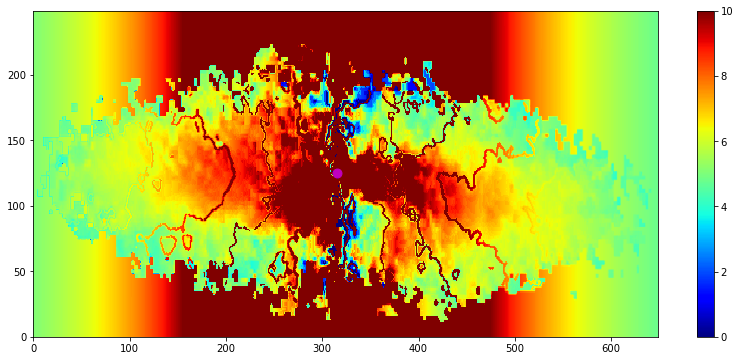

In [87]:
XX,YY = np.meshgrid(np.arange(0.,650,1), np.arange(0.,250,1))
plt.figure(figsize=[14, 6])
quadmesh = plt.pcolormesh(XX, YY, epi, cmap=cm.jet)
quadmesh.set_clim(vmin=0.0, vmax=10.00005)
plt.colorbar()
plt.scatter(315., 125., 80., color='m')

In [88]:
Qgs = np.zeros(Vc.shape)

for i, row in enumerate(Vc):
    for j, col in enumerate(Vc[i]):
        sound_vel = disp[80:730, 300:550].T[i][j]
        gas_density = HI_Sigma[80:730, 300:550].T[i][j]
        Qgs[i][j] = epi[i][j] * sound_vel / (math.pi * 4.32 * gas_density)

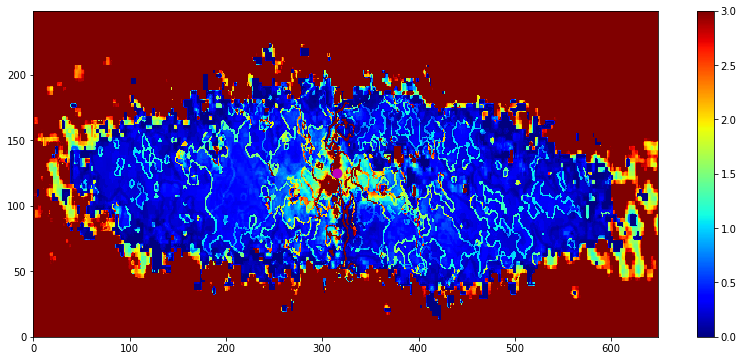

In [91]:
XX,YY = np.meshgrid(np.arange(0.,650,1), np.arange(0.,250,1))
plt.figure(figsize=[14, 6])
quadmesh = plt.pcolormesh(XX, YY, Qgs, cmap=cm.jet)
quadmesh.set_clim(vmin=0.0, vmax=3.)
plt.colorbar()
plt.scatter(315., 125., 80., color='m')